In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel("data_O_Gf.xlsx")
df.head()

,Name,Diameter,Weight,Red,Green,Blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


# ======== Exploratory Data Analysis ========

In [3]:
print(df.shape)
df.describe()

(10000, 6)


,Diameter,Weight,Red,Green,Blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [4]:
df.isnull().sum()

Name        0
Diameter    0
Weight      0
Red         0
Green       0
Blue        0
dtype: int64

since all the columns are having zero null values there is no need for us to do the handling missing data task

<Axes: xlabel='Name', ylabel='count'>

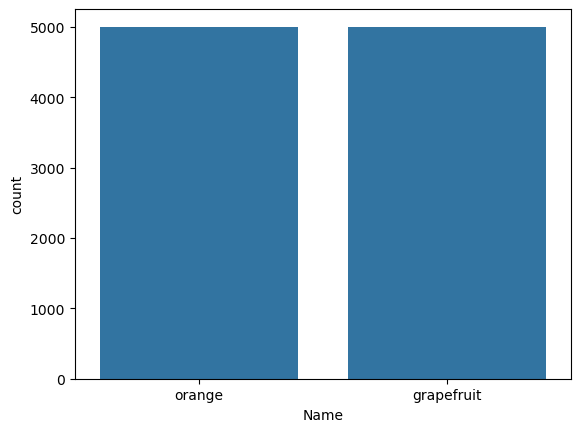

In [5]:
df['Name'].value_counts()  #to check whether both the fruits are having equal data or not
sns.countplot(x='Name', data=df)

array([[<Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Red'}>,
        <Axes: title={'center': 'Green'}>],
       [<Axes: title={'center': 'Blue'}>, <Axes: >]], dtype=object)

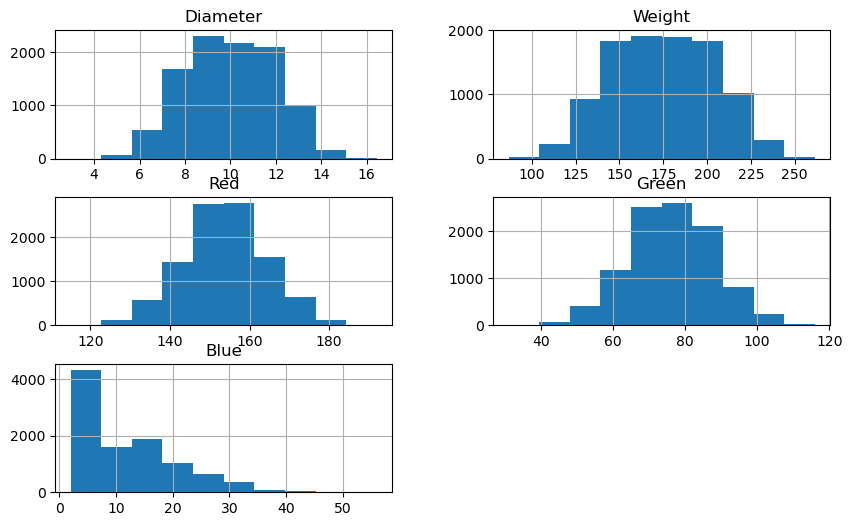

In [6]:
df.hist(figsize=(10,6)) #histogram for each feature

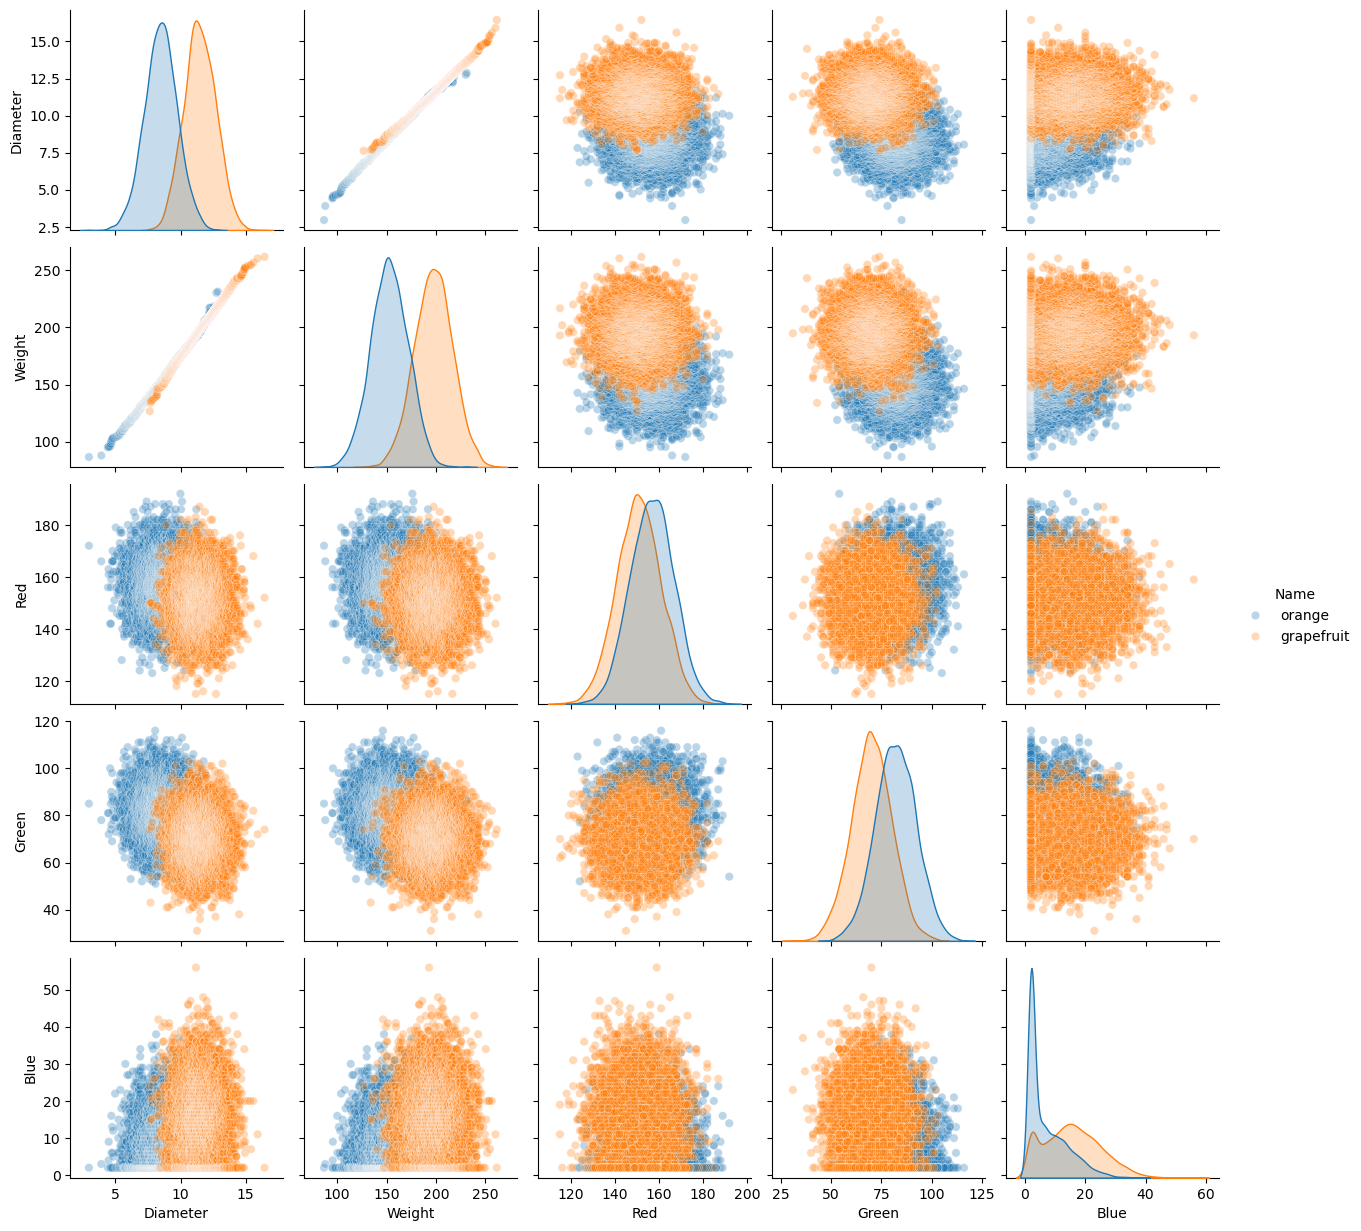

In [7]:
sns.pairplot(df, hue='Name', plot_kws={'alpha': 0.3})  #scatter for each feature with each feature

<Axes: >

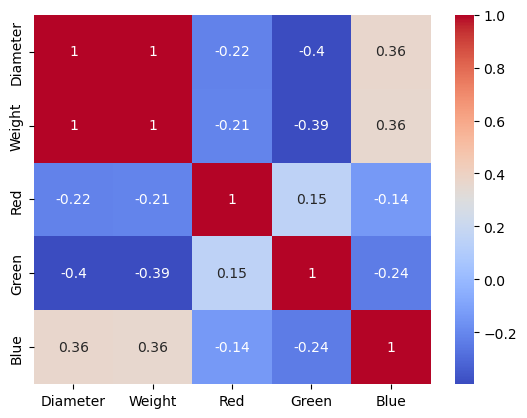

In [8]:
sns.heatmap(df.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm')  #correlation heatmap for the dataset

<Axes: xlabel='Diameter', ylabel='Weight'>

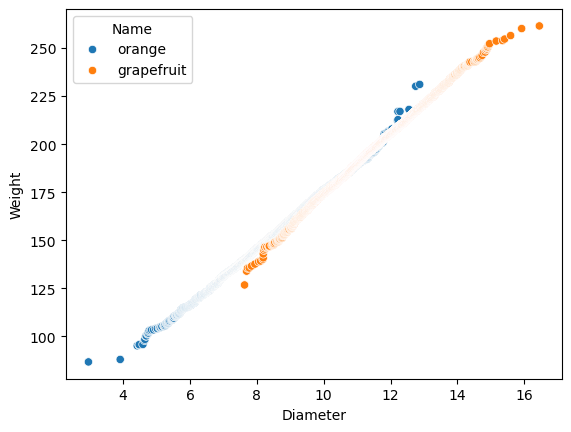

In [9]:
sns.scatterplot(x='Diameter', y='Weight', hue='Name', data=df) 
#gives the scatterplot for diameter against weight

<Axes: >

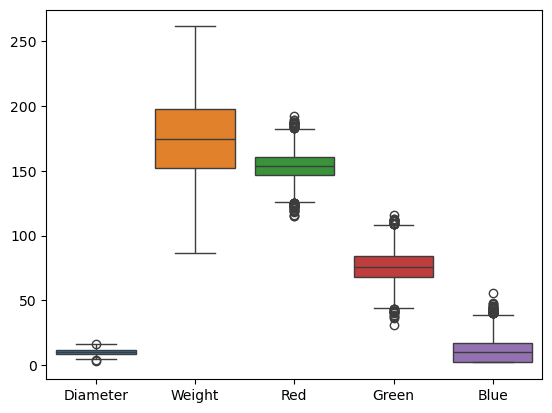

In [10]:
sns.boxplot(data=df[['Diameter', 'Weight', 'Red', 'Green', 'Blue']]) #gives the boxplot of each feature

<Axes: xlabel='Name', ylabel='Red'>

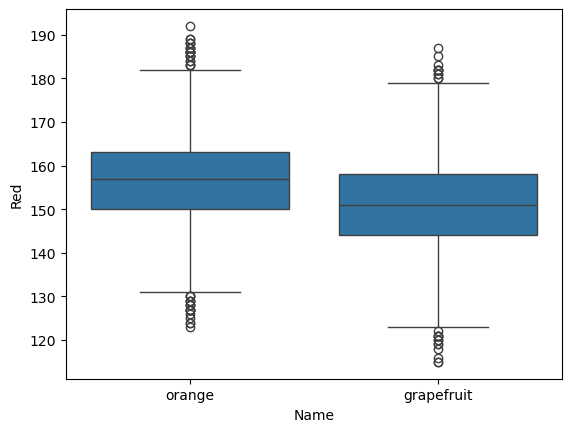

In [11]:
sns.boxplot(x='Name', y='Red', data=df)  #boxplot only for colour red

<Axes: xlabel='Name', ylabel='Green'>

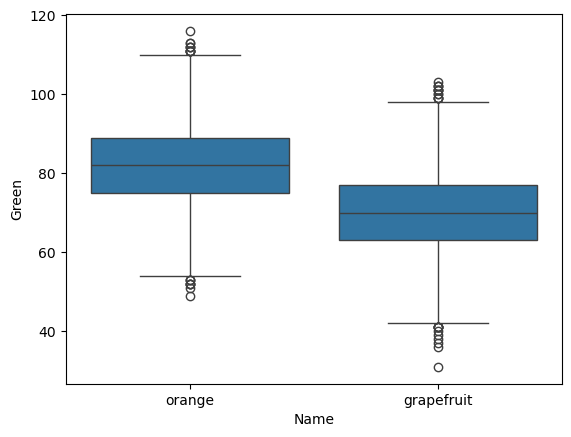

In [12]:
sns.boxplot(x='Name', y='Green', data=df)  #boxplot only for colour green

<Axes: xlabel='Name', ylabel='Blue'>

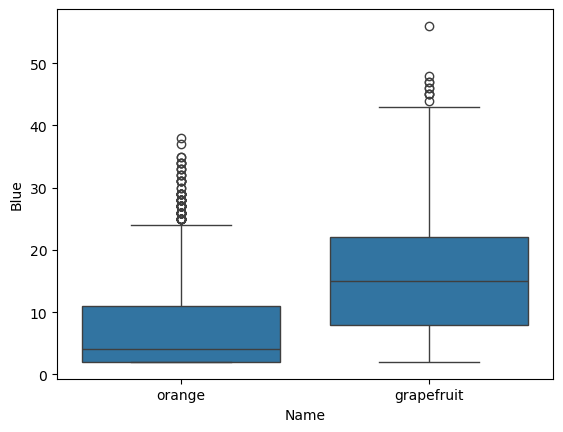

In [13]:
sns.boxplot(x='Name', y='Blue', data=df)  #boxplot only for colour blue

# ======== Train Test Split ========

In [14]:
x = df[['Diameter', 'Weight', 'Red', 'Green', 'Blue']]
y = df[['Name']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
print(x_train.shape, x_test.shape)

(8000, 5) (2000, 5)


# ======== Normalization ========

In [17]:
scaler = StandardScaler()

In [18]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# ======== Model Training ========

### 1. Random Forest Classifier ----------------

In [19]:
model1 = RandomForestClassifier()

In [20]:
model1.fit(x_train_scaled, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [21]:
y_pred1 = model1.predict(x_test_scaled)
y_pred1

array(['grapefruit', 'orange', 'grapefruit', ..., 'grapefruit',
       'grapefruit', 'orange'], dtype=object)

In [22]:
acc1 = accuracy_score(y_test, y_pred1)*100
print('Accuracy of the Random Forest Classifer model = ', acc1, '%')

Accuracy of the Random Forest Classifer model =  95.55 %


### 2. Logistic Regression ----------------

In [23]:
model2 = LogisticRegression()

In [24]:
model2.fit(x_train_scaled, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
y_pred2 = model2.predict(x_test_scaled)
y_pred2

array(['grapefruit', 'orange', 'grapefruit', ..., 'grapefruit',
       'grapefruit', 'orange'], dtype=object)

In [26]:
acc2 = accuracy_score(y_test, y_pred2)*100
print('Accuracy of the Logistic Regression model = ',acc2, '%')

Accuracy of the Logistic Regression model =  94.15 %


### 3. Support Vecotr Machine ----------------

In [27]:
model3 = SVC()

In [28]:
model3.fit(x_train_scaled, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [29]:
y_pred3 = model3.predict(x_test_scaled)
y_pred3

array(['grapefruit', 'orange', 'grapefruit', ..., 'grapefruit',
       'grapefruit', 'orange'], dtype=object)

In [30]:
acc3 = accuracy_score(y_test, y_pred3)*100
print('Accuracy of the Support Vector Machine model = ',acc3, '%')

Accuracy of the Support Vector Machine model =  93.95 %


### 4. k-Nearest Neighbors ----------------

In [31]:
model4 = KNeighborsClassifier()

In [32]:
model4.fit(x_train_scaled, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [33]:
y_pred4 = model4.predict(x_test_scaled)
y_pred4

array(['grapefruit', 'orange', 'grapefruit', ..., 'grapefruit',
       'grapefruit', 'orange'], dtype=object)

In [34]:
acc4 = accuracy_score(y_test, y_pred4)*100
print('Accuracy of the k-Nearest Neighbors model = ',acc4, '%')

Accuracy of the k-Nearest Neighbors model =  92.85 %


### 5. Decision Tree ----------------

In [35]:
model5 = DecisionTreeClassifier()
model5.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [36]:
y_pred5 = model5.predict(x_test_scaled)
y_pred5

array(['grapefruit', 'orange', 'grapefruit', ..., 'grapefruit', 'orange',
       'orange'], dtype=object)

In [37]:
acc5 = accuracy_score(y_test, y_pred5)*100
print('Accuracy of the Decision Tree model = ',acc5, '%')

Accuracy of the Decision Tree model =  94.8 %


# ======== Accuracy Comparision of Models ========

In [38]:
model_name = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [acc1, acc2, acc3, acc4, acc5]

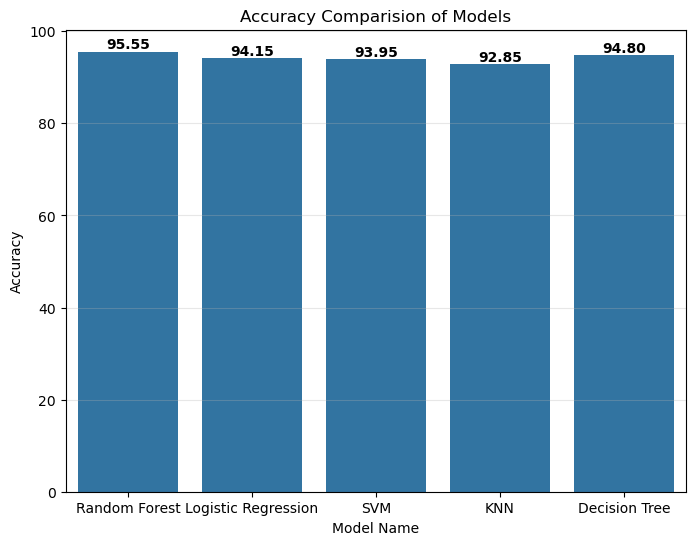

In [39]:
plt.figure(figsize=(8, 6))
plot = sns.barplot(x=model_name, y=accuracies)

for i, v in enumerate(accuracies):
    plot.text(i, v + 0.01, f"{v:.2f}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Accuracy Comparision of Models")
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.grid(axis='y', alpha=0.3)